In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from acquire import get_connection, new_telco_churn_data, get_telco_churn_data
from prepare import clean_telco_df, prep_telco, telco_split


## EXPLORE

In [2]:
df = get_telco_churn_data()
train, validate , test = prep_telco(df)

# usable code

In [3]:
train.shape

(3943, 28)

In [4]:
quant_vars = ['tenure','monthly_charges','total_charges']
cat_vars = list((train.columns).drop(quant_vars))
target = 'has_churned'


Text(0, 0.5, 'Correlation')

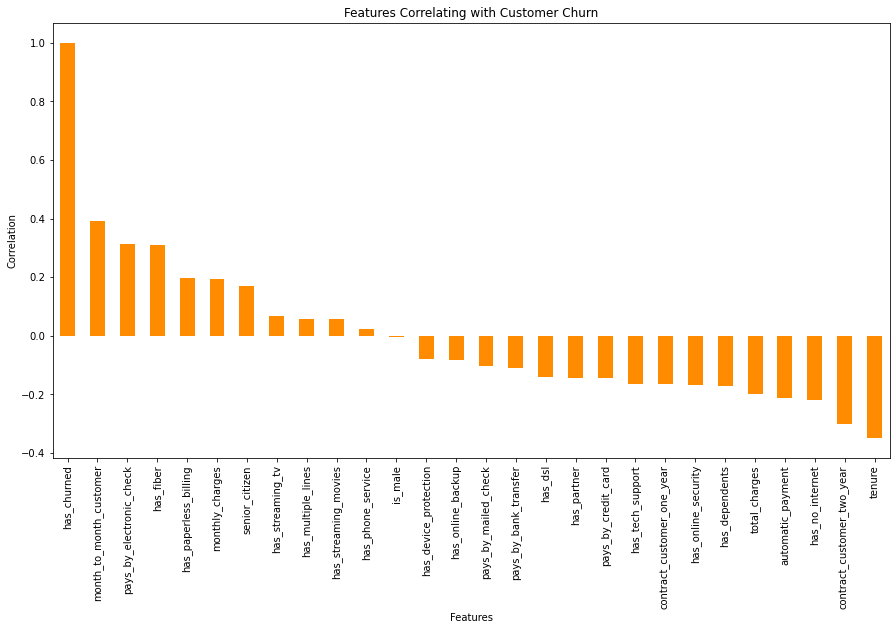

In [56]:
plt.figure(figsize=(15,8))
train.corr()['has_churned'].sort_values(ascending = False).plot(kind='bar',color = "darkorange")
plt.title("Features Correlating with Customer Churn")
plt.xlabel("Features")
plt.ylabel("Correlation")

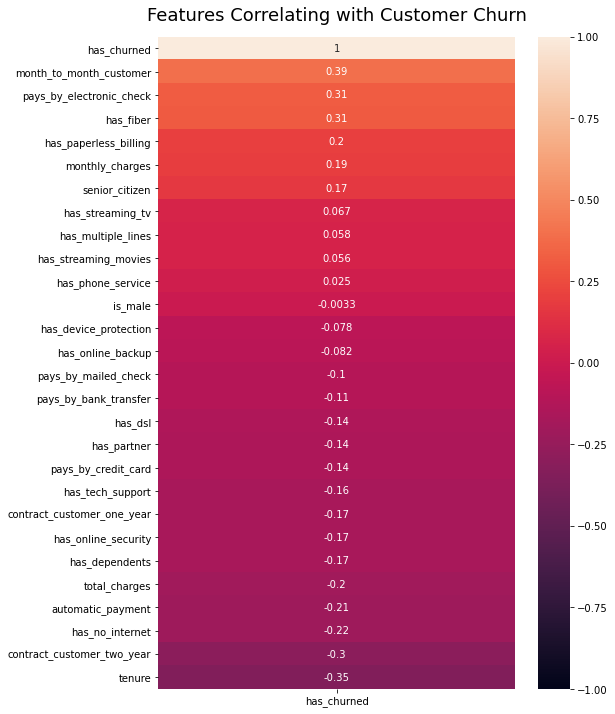

In [5]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train.corr()[['has_churned']].sort_values(by='has_churned', ascending=False), vmin=-1, vmax=1, annot=True, cmap='rocket')
heatmap.set_title('Features Correlating with Customer Churn', fontdict={'fontsize':18}, pad=16);

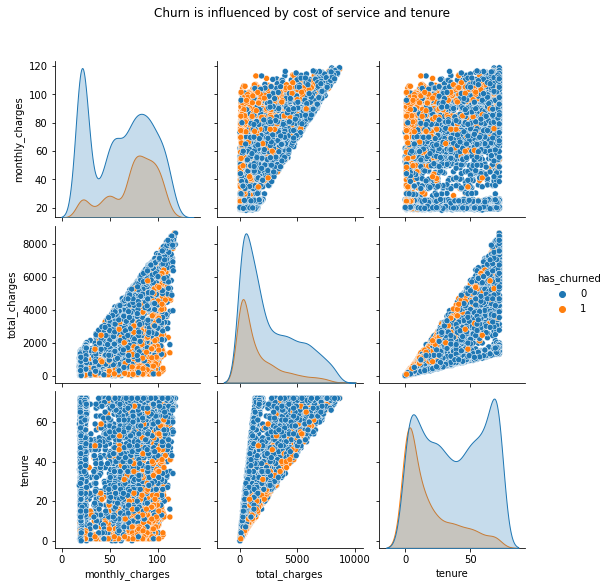

In [7]:

g = sns.pairplot(train, vars = ['monthly_charges','total_charges','tenure'], hue = 'has_churned')
g.fig.suptitle("Churn is influenced by cost of service and tenure", y=1.08)
plt.show()

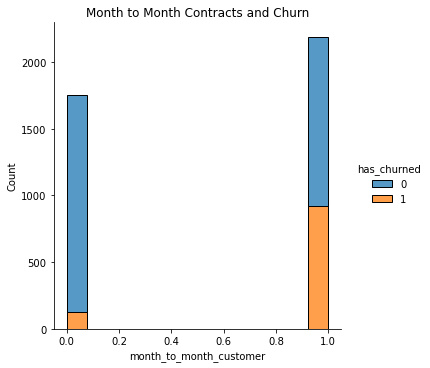

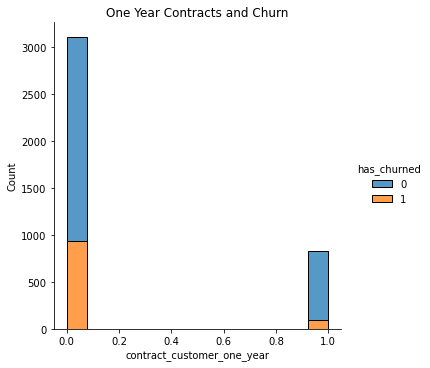

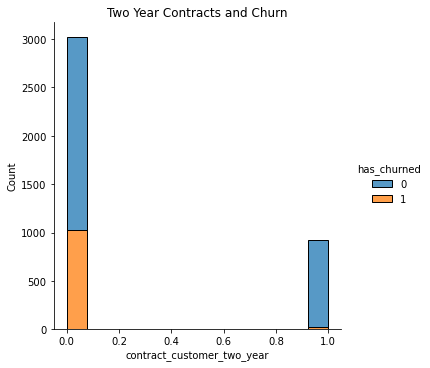

In [83]:
sns.displot(train, x='month_to_month_customer', hue = 'has_churned', multiple= 'stack')
plt.title('Month to Month Contracts and Churn')
plt.show()

sns.displot(train, x='contract_customer_one_year', hue = 'has_churned', multiple= 'stack')
plt.title('One Year Contracts and Churn')
plt.show()


sns.displot(train, x='contract_customer_two_year', hue = 'has_churned', multiple= 'stack')
plt.title('Two Year Contracts and Churn')
plt.show()


# Lets make some hypothesis